# Unsupervised Machine Learning

## Reading Data

In [34]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv("dairy_bull_data.csv")
df=df.set_index(['breed',"country_of_origin"])

In [9]:
df.head(4)

sire_code      period  price  birth_date  pta_milk  \
breed country_of_origin                                                       
AY    CAN                    18491  2000-02-01   12.0  1991-10-20    1124.0   
      CAN                    18493  2000-02-01   18.0  1992-06-15    1664.0   
      CAN                    18697  2000-02-01   12.0  1992-05-30     939.0   
      CAN                    18696  2000-02-01   12.0  1992-06-25     660.0   

                         pta_fat_lb  pta_scs  pta_protein_lb  pta_dpr  
breed country_of_origin                                                
AY    CAN                      41.0     3.32            32.0      NaN  
      CAN                      44.0     2.92            35.0      NaN  
      CAN                      45.0     2.87            27.0      NaN  
      CAN                      30.0     3.28            21.0      NaN

In [10]:
df.shape

(167037, 9)

In [11]:
datas=df
datas_std = (datas - datas.mean())/datas.std()

C:\Users\fxx\AppData\Local\Temp\ipykernel_16276\2710578060.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datas_std = (datas - datas.mean())/datas.std()


In [13]:
datas_std.head(4)

birth_date period     price  pta_dpr  pta_fat_lb  \
breed country_of_origin                                                    
AY    CAN                      NaN    NaN -0.727975      NaN   -1.472935   
      CAN                      NaN    NaN -0.376554      NaN   -1.398881   
      CAN                      NaN    NaN -0.727975      NaN   -1.374197   
      CAN                      NaN    NaN -0.727975      NaN   -1.744464   

                         pta_milk  pta_protein_lb   pta_scs  sire_code  
breed country_of_origin                                                 
AY    CAN               -1.401275       -1.783170  1.218670   1.007704  
      CAN               -0.843220       -1.684505 -0.663409   1.008007  
      CAN               -1.592461       -1.947611 -0.898669   1.038877  
      CAN               -1.880790       -2.144941  1.030462   1.038726

In [65]:
K=9
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(datas_std.fillna(0)) 
#pca_model.transform(assets_std.fillna(0))

In [23]:
pca_model.explained_variance_ratio_

array([4.61635929e-01, 1.69468666e-01, 1.51781561e-01, 8.97190676e-02,
       8.22314252e-02, 3.80639341e-02, 7.09941692e-03, 6.28205334e-35,
       0.00000000e+00])

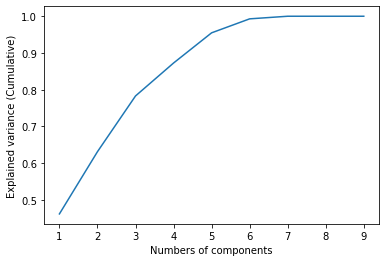

In [26]:
plt.plot(list(range(1,K+1)),pca_model.explained_variance_ratio_.cumsum());
plt.xlabel('Numbers of components');
plt.ylabel('Explained variance (Cumulative)');

In [27]:
pca_model.explained_variance_

array([3.01270258e+00, 1.10597693e+00, 9.90548333e-01, 5.85519560e-01,
       5.36654128e-01, 2.48410718e-01, 4.63318176e-02, 4.09975851e-34,
       0.00000000e+00])

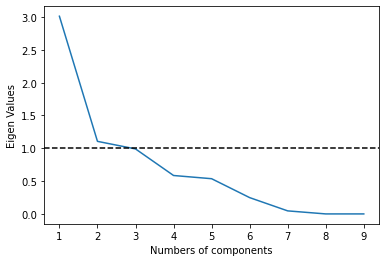

In [28]:
plt.plot(list(range(1,K+1)),pca_model.explained_variance_);
plt.axhline(1,ls="--",color='black');
plt.xlabel('Numbers of components');
plt.ylabel('Eigen Values');

In [29]:
K = 6
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(datas_std.fillna(0))

In [30]:
load_scores = pd.DataFrame(pca_model.components_)
load_scores.T

,0,1,2,3,4,5
0,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,-1.110223e-16,8.532671e-17,-1.463673e-18,8.276528e-17,-9.019588e-17,-1.792562e-16
2,1.518950e-01,3.565965e-02,6.630017e-02,3.751201e-01,9.102668e-01,4.416718e-02
3,1.630085e-01,7.258620e-01,1.267585e-01,5.764424e-01,-3.049067e-01,4.750068e-02
4,5.196148e-01,-1.691106e-01,3.175798e-03,6.050056e-02,-6.924945e-02,-7.644543e-01
5,5.226022e-01,-2.277356e-01,-4.485759e-02,-6.974366e-03,-1.046048e-01,6.340803e-01
6,5.511826e-01,-1.893108e-01,-3.026909e-02,9.183957e-02,-1.220973e-01,9.336450e-02
7,-3.157700e-01,-5.485523e-01,-2.112547e-01,7.152333e-01,-2.050680e-01,-4.566770e-03
8,-6.107920e-02,-2.337579e-01,9.653857e-01,5.741931e-02,-7.581538e-02,2.463572e-02


In [31]:
#sum(load_scores.T[0]**2)

In [40]:
class PCA_Model:
    def __init__(self,ncomps,data,cols):
        self.ncomps = ncomps
        self.cols = cols
        self.data = data
        self.scaled_data = StandardScaler().fit_transform(data[cols].values)
        
    def fit(self):
        self.PCA_obj = PCA(self.ncomps).fit(self.scaled_data)
    
    def describe(self):
        explvar_ = self.PCA_obj.explained_variance_ratio_

        explvar = pd.DataFrame(explvar_[np.newaxis,:]*100,\
                               columns=["Component " + str(x) for x in range(self.ncomps)],\
                               index=["% Explained Variance"])
        
        loadscores_ = self.PCA_obj.components_
        loadscores = pd.DataFrame(loadscores_,\
                                  columns=self.cols,\
                                  index=["Component " + str(x) for x in range(self.ncomps)])
        print("Explains {0:0.2f}% of the variance".format(round(sum(explvar_),2)*100))
        print(explvar)
        print(loadscores)
        return explvar,loadscores
    
    def gen_data(self):
        return self.PCA_obj.transform(self.scaled_data)
    
    def graph(self,alpha=.6):
        self.graphdata = pd.concat([self.data[[color]].reset_index(drop=True),\
                                    pd.DataFrame(self.gen_data()).reset_index(drop=True)],axis=1)
        if self.ncomps==2:
            return self.graphdata.plot(kind="scatter",x=0,y=1,\
                                       c=color,alpha=alpha,colormap=cm)
        else:
            ax = plt.axes(projection='3d')
            ax.scatter3D(self.graphdata[0], \
                         self.graphdata[1], \
                         self.graphdata[2])#, \
                         #c=color,colormap=cm)

In [61]:
colus = list(datas.columns)
colus.remove('period')
colus.remove('birth_date')

pca2 = PCA_Model(2,datas.fillna(0),colus)
pca2.fit()

In [62]:
components=pd.DataFrame(pca2.gen_data())

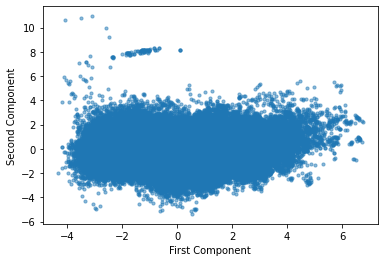

In [63]:
plt.scatter(components[0], components[1], s=10, alpha=0.5);
plt.xlabel('First Component');
plt.ylabel('Second Component');

In [64]:
import plotly.express as px
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs

ModuleNotFoundError: No module named 'plotly'